<H1> ACTIVITY #2 :UK ACCIDENTS </H1>
<hr>
<h3> Analysts : Quert Russel Lalisan</h3>

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings("ignore")

In [2]:
accident = pd.read_csv('dataset\\uk_road_accident.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [6]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

<h1> CLearing Any Inconsistencies with the Data Set</h1>

In [7]:
accident['Accident Date'] = accident['Accident Date'].str.strip()

accident['Accident Date'] = accident['Accident Date'].astype('str')

accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [8]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [9]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1> Questions and Insights</h1>

<h1>1) What is the overall distribution of Accident Severity (e.g., Fatal, Serious, Slight)?</h1>

In [10]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

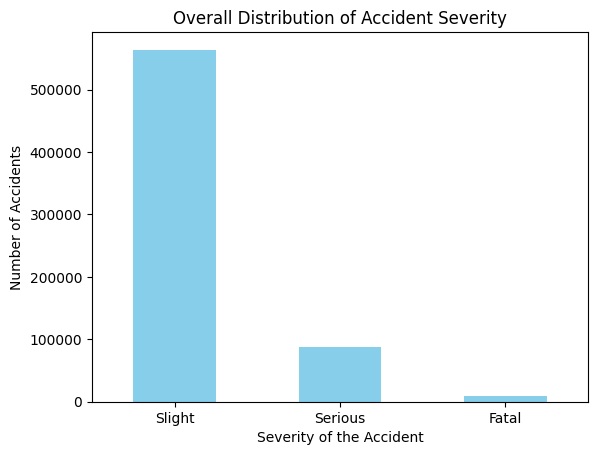

In [11]:
accident_severe = accident['Accident_Severity'].value_counts()

accident_severe.plot(kind='bar', color="skyblue")
plt.title("Overall Distribution of Accident Severity")
plt.xlabel("Severity of the Accident")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=360)
plt.show()

<h2>Insights 1 ) : The overall distribution of Accidents severity are </h2>
<h4>from the lowest being Fatal with 8661 recorded accidents<br>from the middle range being Serious with 88217 recorded accidents<br>from the lowest being Fatal with 563801 recorded accidents</h4>

<h1>2) Which District Area reports the highest number of severe accidents?</h1>

In [12]:
accident.groupby('Accident_Severity')['District Area'].value_counts()

Accident_Severity  District Area           
Fatal              Birmingham                  105
                   Leeds                        93
                   Highland                     88
                   East Riding of Yorkshire     85
                   Bradford                     71
                                              ... 
Slight             Berwick-upon-Tweed          121
                   Shetland Islands            113
                   Teesdale                    110
                   Orkney Islands               96
                   Clackmannanshire             72
Name: count, Length: 1266, dtype: int64

In [13]:
accident[accident['Accident_Severity'] == 'Fatal']['District Area'].describe()

count           8661
unique           422
top       Birmingham
freq             105
Name: District Area, dtype: object

In [14]:
fatal = accident[accident['Accident_Severity'] == 'Fatal']
summary = fatal.groupby('Year')['Number_of_Vehicles'].value_counts()

print(summary)

Year  Number_of_Vehicles
2019  1                     1204
      2                     1082
      3                      286
      4                       98
      5                       15
      6                       12
      7                        7
      8                        5
      14                       2
      9                        1
      11                       1
      28                       1
2020  1                     1070
      2                      912
      3                      242
      4                       78
      5                       23
      7                        5
      8                        5
      6                        4
      11                       1
      14                       1
2021  1                      951
      2                      818
      3                      210
      4                       53
      5                       14
      6                        5
      7                        2
      10          

In [15]:
accident[accident['Accident_Severity'] == 'Serious']['District Area'].describe()

count          88217
unique           422
top       Birmingham
freq            1474
Name: District Area, dtype: object

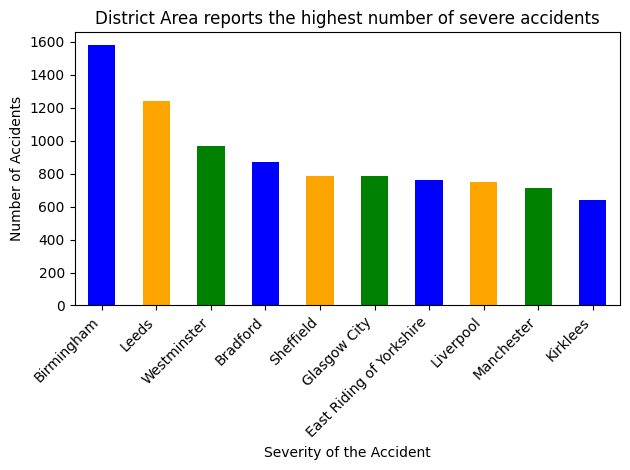

In [16]:
top_districts = (
    accident[accident['Accident_Severity'] != 'Slight']['District Area']
    .value_counts()
    .head(10)
)

top_districts.plot(kind='bar', color=["Blue",'orange','green'])
plt.title("District Area reports the highest number of severe accidents")
plt.xlabel("Severity of the Accident")
plt.xticks( rotation=45, ha="right")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

<h2>Insights 2) : The District Area with highest Severity of accident  is <b>"Birmingham"</b> </h2>
<h4> With a toal value of <b> 105 Fatal accidents </b> only in Birmingham <br> and a total value of <b> 1474 Fatal accidents  </b>in Birmingham </h4>

<h1>3) How does the number of casualties differ by Accident Severity?</h1>

In [17]:
accident.groupby('Accident_Severity')['Number_of_Casualties'].describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
Fatal,8661.0,1.903129,1.901614,1.0,1.0,1.0,2.0,68.0
Serious,88217.0,1.467280,1.027915,1.0,1.0,1.0,2.0,45.0
Slight,563801.0,1.331402,0.754502,1.0,1.0,1.0,1.0,47.0


In [18]:
accident.groupby('Accident_Severity')['Number_of_Casualties'].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

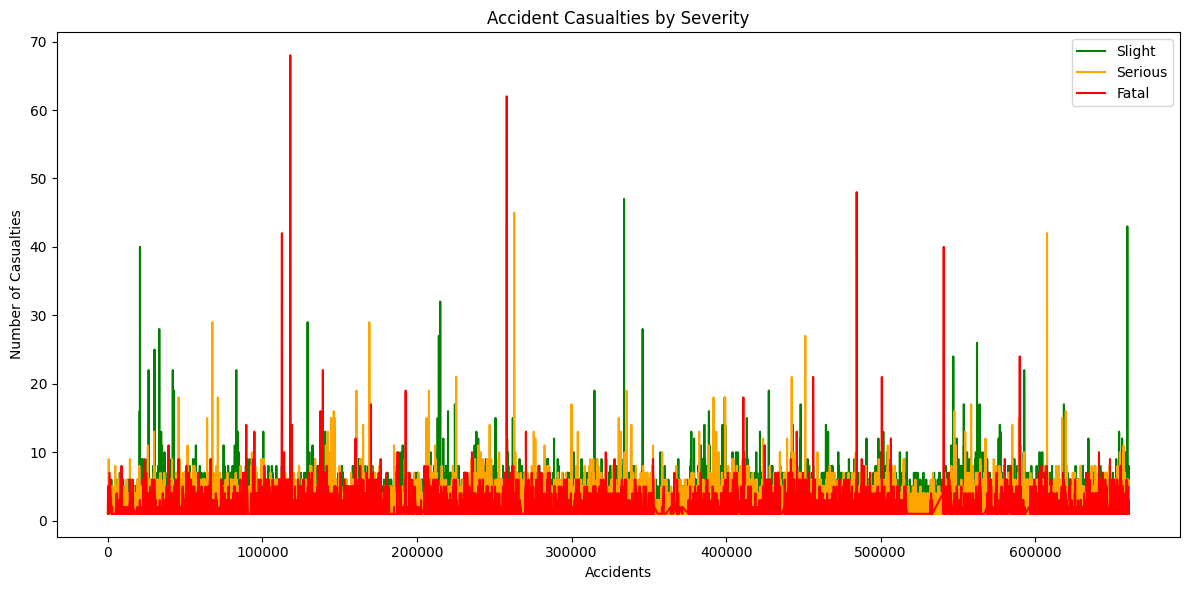

In [19]:

slight = accident[accident["Accident_Severity"] == "Slight"]
serious = accident[accident["Accident_Severity"] == "Serious"]
fatal = accident[accident["Accident_Severity"] == "Fatal"]

plt.figure(figsize=(12,6))

plt.plot(slight.index, slight["Number_of_Casualties"], label="Slight", color="green")
plt.plot(serious.index, serious["Number_of_Casualties"], label="Serious", color="orange")
plt.plot(fatal.index, fatal["Number_of_Casualties"], label="Fatal", color="red")

plt.title("Accident Casualties by Severity")
plt.xlabel("Accidents")
plt.ylabel("Number of Casualties")

plt.legend()

plt.tight_layout()
plt.show()

<h2> Insights 3 ) : The number of Casualties by Accident severity (Serious, Slight, Fatal) </h2>
<h4> Most accidents across all severity levels involve only one casualty, but Fatal accidents tend to have more people affected on average (≈1.9 per accident) compared to Serious (≈1.5) and Slight (≈1.3). This suggests that when an accident is fatal, it is more likely to involve multiple casualties, and although rare, some accidents can result in extremely high casualty counts (up to 68).</h4>

<h1>4) On average, how many vehicles are involved in accidents by severity level?</h1>

In [20]:
accident.groupby('Accident_Severity')['Number_of_Vehicles'].describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
Fatal,8661.0,1.786976,1.022719,1.0,1.0,2.0,2.0,28.0
Serious,88217.0,1.678327,0.751475,1.0,1.0,2.0,2.0,19.0
Slight,563801.0,1.855864,0.700571,1.0,1.0,2.0,2.0,32.0


In [21]:
accident.groupby('Accident_Severity')['Number_of_Vehicles'].mean()

Accident_Severity
Fatal      1.786976
Serious    1.678327
Slight     1.855864
Name: Number_of_Vehicles, dtype: float64

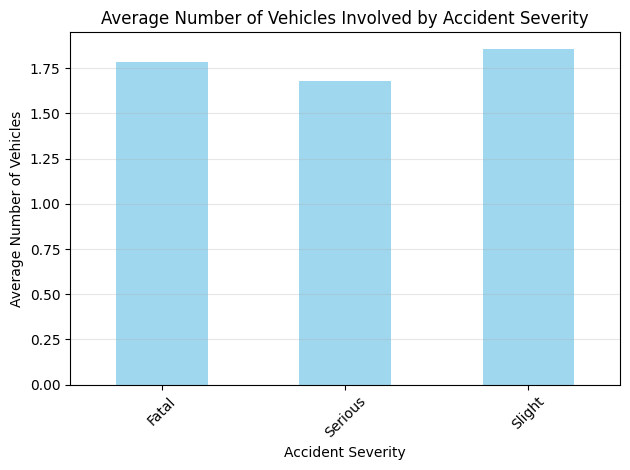

In [22]:

severity_vehicles_mean = accident.groupby('Accident_Severity')['Number_of_Vehicles'].mean()

severity_vehicles_mean.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Average Number of Vehicles Involved by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Average Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.show()


<h2> Insights 4) : </h2> 
 <h4>   <br> For every severity level there is an average of <b>1.786976 vehicles</b> for cases that has severity of fatal, <b>1.678327 vehicles</b> for cases that are serious, whilst on Slight <b> 1.855864 vehicles</b> involve in accidents</h4>

<h1>5) Which dates had the highest accident counts?</h1>

In [23]:
accident['Accident Date'].value_counts()

Accident Date
2019-11-30    704
2019-01-31    697
2019-07-13    692
2021-11-13    692
2019-08-14    688
             ... 
2022-12-30    171
2019-12-25    157
2022-12-25    145
2022-01-10    123
2020-12-25    118
Name: count, Length: 1461, dtype: int64

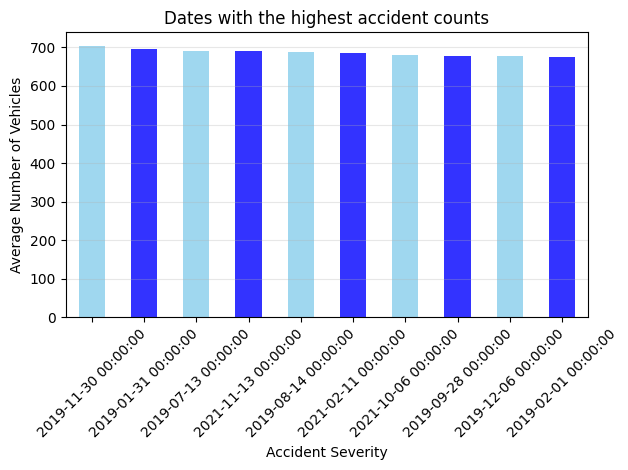

In [24]:

highest_date = accident['Accident Date'].value_counts().head(10)

highest_date.plot(kind='bar', color=['skyblue','blue'], alpha=0.8)
plt.title('Dates with the highest accident counts')
plt.xlabel('Accident Severity')
plt.ylabel('Average Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.show()


<h2> Insights 5) : The top 3 dates with the highest accidents occured are the following  </h2>
<h4>-<b> November 11, 2019 </b> with <b> 704 accidents </b> that happened <br>  <b>- January 1, 2019 </b> with <b> 697 accidents </b> that occured<br> <b>- July 13, 2019 </b> with <b> 692 accidents </b> that occured</h4>

<h1>6) Is Number of vehicles correlated with the Light coditions of the area?</h1>

In [25]:
groups = [group['Number_of_Vehicles'].values 
          for name, group in accident.groupby('Light_Conditions')]

# Run ANOVA
f_stat, p_value = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 1490.443082005459
p-value: 0.0


In [26]:
accident['Light_Conditions'].unique()

array(['Darkness - lights lit', 'Daylight', 'Darkness - lighting unknown',
       'Darkness - lights unlit', 'Darkness - no lighting'], dtype=object)

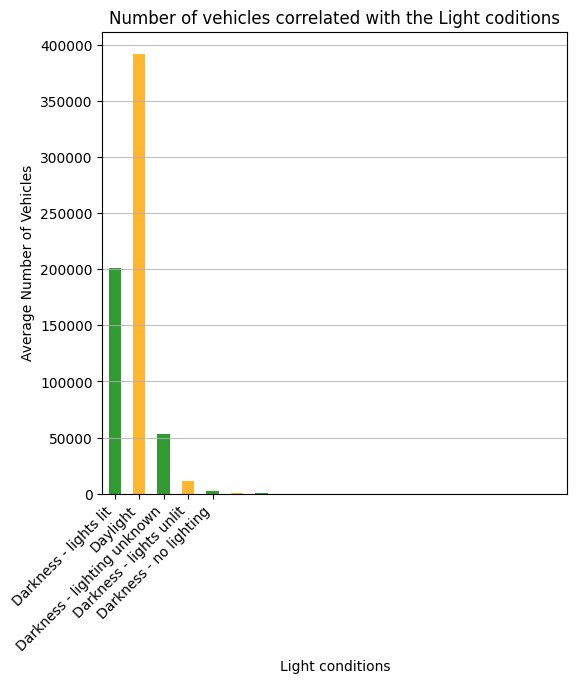

In [27]:
highest_date = accident.groupby('Number_of_Vehicles')['Light_Conditions'].count()

highest_date.plot(kind='bar', figsize=(6,6),color=['green','orange'], alpha=0.8)
plt.title('Number of vehicles correlated with the Light coditions')
plt.xlabel('Light conditions')
plt.ylabel('Average Number of Vehicles')
plt.xticks(rotation=45, ha = 'right')
plt.grid(axis='y', alpha=0.8)
plt.xticks(range(0, 5), ['Darkness - lights lit', 'Daylight', 'Darkness - lighting unknown',
       'Darkness - lights unlit', 'Darkness - no lighting'])
plt.margins(x=0.5)
plt.show()


<h2> Insights 6) </h2>
<h4>
The results show that there is a clear difference between groups when comparing the average number of vehicles across light conditions. 
The very small p-value indicates that these differences are not due to random chance. 
This suggests that the time of day (e.g., daytime vs nighttime conditions) has a statistically significant impact on how many vehicles are typically involved in accidents.
</h4>

<h1>7) Do accidents cluster more in urban or rural areas when it's bad weather?</h1>

In [28]:
accident['Weather_Conditions'].unique()

array(['Fine no high winds', 'Raining no high winds', 'Other',
       'Fine + high winds', 'Raining + high winds',
       'Snowing no high winds', 'Fog or mist', 'Snowing + high winds'],
      dtype=object)

In [29]:
Rainy_Weather = [
    'Raining no high winds',
    'Raining + high winds',
    'Fog or mist',
    'Snowing + high winds'
]

rainy_accidents = accident[accident['Weather_Conditions'].isin(Rainy_Weather)]

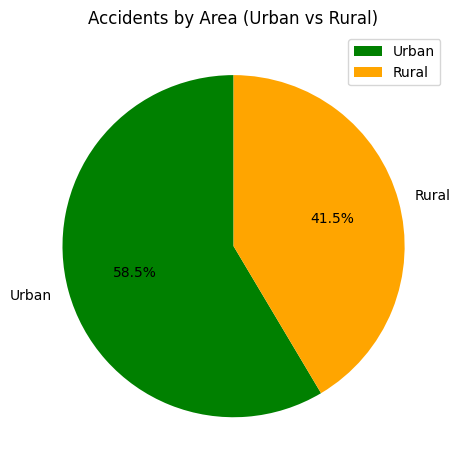

The number of accidents occured during bad weathers are 

 Urban_or_Rural_Area
Urban    54867
Rural    38852
Name: count, dtype: int64


In [30]:
Rainy_Weather = [
    'Raining no high winds',
    'Raining + high winds',
    'Fog or mist',
    'Snowing + high winds'
]

rainy_accidents = accident[accident['Weather_Conditions'].isin(Rainy_Weather)]
urban_or_rural = rainy_accidents[rainy_accidents['Urban_or_Rural_Area'] != "Unallocated"]['Urban_or_Rural_Area'].value_counts()


urban_or_rural.plot(
    kind='pie',
    colors=['green', 'orange'],
    autopct='%1.1f%%',     
    startangle=90,    
    legend=True           
)

plt.title("Accidents by Area (Urban vs Rural)")
plt.ylabel("") 
plt.tight_layout()
plt.show()


print(f'The number of accidents occured during bad weathers are \n\n {urban_or_rural}')


<h2> Insights 7) </h2>
<h4>
According to the results, accidents occur more frequently in Urban areas (54,867 cases) compared to Rural areas (38,852 cases). This suggests that higher traffic density, complex road networks, and greater vehicle interactions in urban environments contribute to the increased likelihood of accidents compared to rural roads.
</h4>

<h1>8) Is there a correlation between the number of vehicles involved and the number of casualties?</h1>

In [31]:
accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

np.float64(0.22888886126927557)

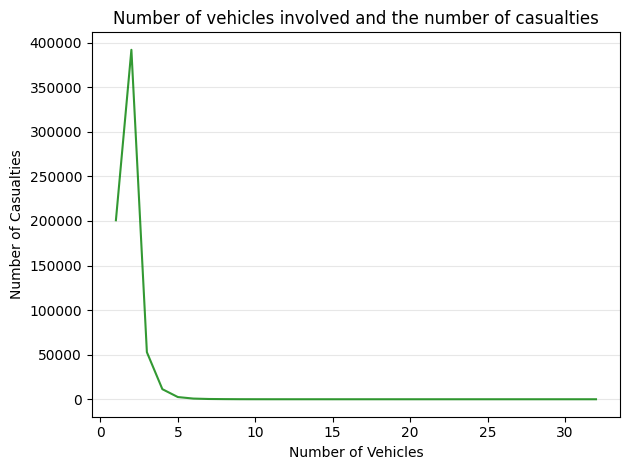

In [32]:
vehicles_cas = accident.groupby('Number_of_Vehicles')['Number_of_Casualties'].count()

vehicles_cas.plot(kind='line', color=['green','orange'], alpha=0.8)
plt.title('Number of vehicles involved and the number of casualties')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.show()


<h2> Insights 8) </h2>
<h4>
There is a <b>weak positive correlation (0.22)</b> between the number of vehicles involved and the number of casualties. This means that as more vehicles are involved in an accident, the number of casualties tends to increase slightly, but the relationship is not strong.
</h4>


<h1>9) How do Weather Conditions impact accident severity?</h1>

In [33]:
Weather_severity = accident.groupby('Accident_Severity')['Weather_Conditions'].count()

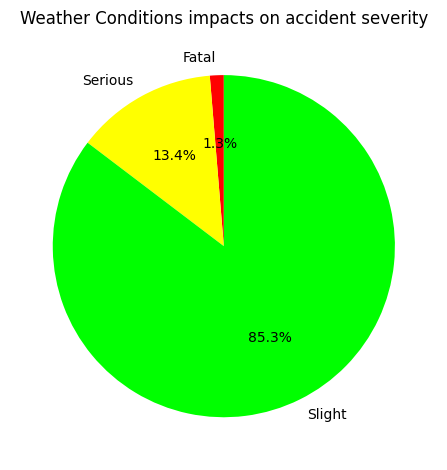

In [34]:
# Pie chart
Weather_severity.plot(
    kind='pie',
    colors=['red', 'yellow', 'lime'],  # slight, serious, fatal
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Weather Conditions impacts on accident severity")
plt.ylabel("")  # remove default ylabel
plt.tight_layout()
plt.show()

<h2> Insights 9) </h2>
<h4>
The data shows that weather conditions do not strongly impact accident severity. Most accidents occur during <b>Fine, no high winds</b> conditions, not during rainy or bad weather. This suggests that the higher number of accidents in clear weather may be due to number of vehicles rather than weather-related risks.
</h4>

<h1>10) What is the relationship between Light Conditions (daylight, darkness, streetlights) and accidents?</h1>

In [35]:
from scipy.stats import f_oneway

groups = [
    grp["Number_of_Casualties"].dropna().values
    for name, grp in accident.groupby("Light_Conditions")
]

f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)


F-statistic: 534.4033532420921
p-value: 0.0


In [36]:
acc = accident['Light_Conditions'].value_counts()
acc

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h2> Insights 10) </h2>
<h4>
Most accidents happen in <b>daylight</b> (484,880 cases). This is likely because there are more cars on the road during the day compared to night.
</h4>

<h2> Insights 11) </h2>
<h4>
Even though fewer accidents happen at night, the data shows that the <b>seriousness</b> of accidents does not really depend on whether it is day or night.
</h4>

<h1>11) Do Road Surface Conditions (dry, wet, icy) affect the number of casualties?</h1>

In [37]:
accident['Road_Surface_Conditions'].unique()

array(['Dry', 'Wet or damp', 'Snow', 'Frost or ice',
       'Flood over 3cm. deep'], dtype=object)

In [38]:
accident.groupby('Road_Surface_Conditions')['Number_of_Casualties'].describe()

,count,mean,std,min,25%,50%,75%,max
Road_Surface_Conditions,,,,,,,,
Dry,448547.0,1.334545,0.794438,1.0,1.0,1.0,1.0,45.0
Flood over 3cm. deep,1017.0,1.495575,0.977216,1.0,1.0,1.0,2.0,9.0
Frost or ice,18517.0,1.348815,0.838040,1.0,1.0,1.0,1.0,48.0
Snow,5890.0,1.359593,0.765221,1.0,1.0,1.0,2.0,18.0
Wet or damp,186708.0,1.411064,0.890931,1.0,1.0,1.0,2.0,68.0


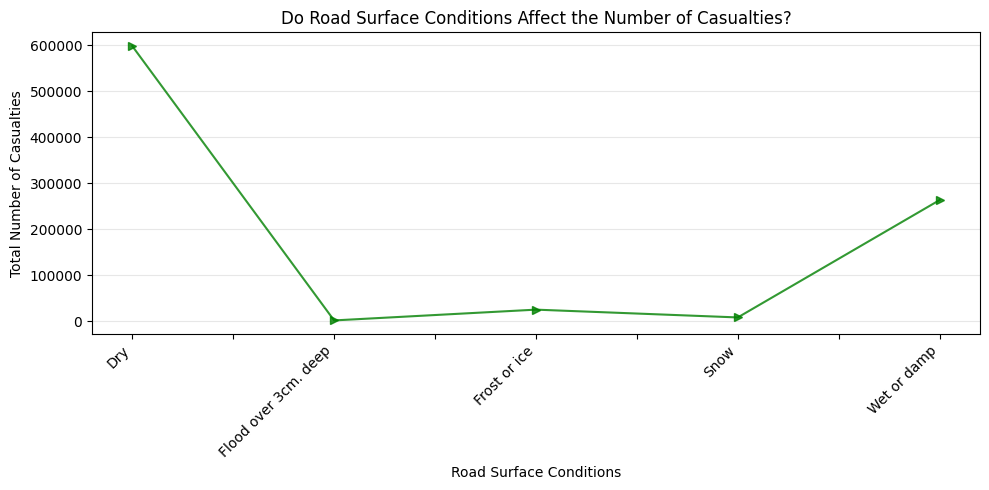

In [39]:
road = accident.groupby('Road_Surface_Conditions')['Number_of_Casualties'].sum()

road.plot(
    kind='line',
    color='green',
    marker=">",
    alpha=0.8,
    figsize=(10, 5)
)

plt.title('Do Road Surface Conditions Affect the Number of Casualties?')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Total Number of Casualties')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


<h2> Insights 12) </h2>
<h4> Road surface conditions does affect the number of Casualties, Having dry roads having the most amount of accidents occured compare to Wet,damp or snowy roads</h4>

<h1>12) Which Road Type (single carriageway, dual carriageway, roundabout, etc.) has the most accidents?</h1>

In [40]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

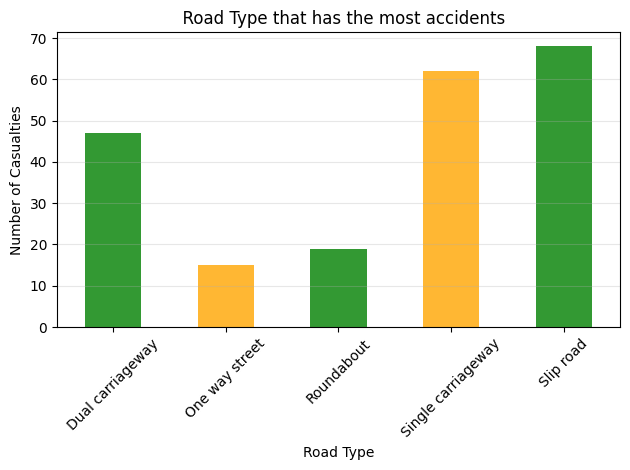

In [41]:
road = accident.groupby('Road_Type')['Number_of_Casualties'].max().head(10)

road.plot(kind='bar', color=['green','orange'], alpha=0.8)
plt.title('  Road Type that has the most accidents')
plt.xlabel('Road Type')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.show()

<h2> Insigths 13) : </h2>
<h2> The type of road that has the most frequent accidents are <b> Single Carriageway </b> with a total number accidents of 496,663 </h2>

<h1>13) Which Vehicle Type is most frequently involved in accidents?</h1>

In [42]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

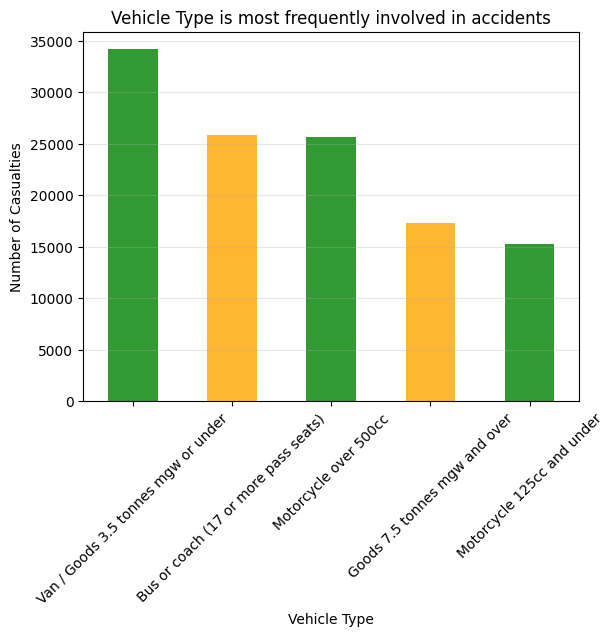

In [43]:
vehicle = accident[accident['Vehicle_Type']!='Car']['Vehicle_Type'].value_counts().head(5)

vehicle.plot(kind='bar', color=['green','orange'], alpha=0.8)
plt.title('Vehicle Type is most frequently involved in accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

<h2> Insights 14) :</h2>
<h4> Vehicles such as Cars, Van and Bus are the top 3 most frequently used vehicles that are involved in accidents. Car having <b> 497,992 involved accidents </b>, Van having <b> 34,160 involved accidents </b>, and Bus having<b> 25,878 involved accidents </b></h4>

<h1>14) Do motorcycles vs. cars show higher casualty counts?</h1>

In [44]:
car = accident[accident['Vehicle_Type'] == 'Car'].count().sum()
motor = accident[accident['Vehicle_Type'] == 'Motorcycle over 500cc'].count().sum()

print(f'The amount accidents that happens on motorcycles are {motor}, while cars has {car}')

The amount accidents that happens on motorcycles are 461826, while cars has 8963856


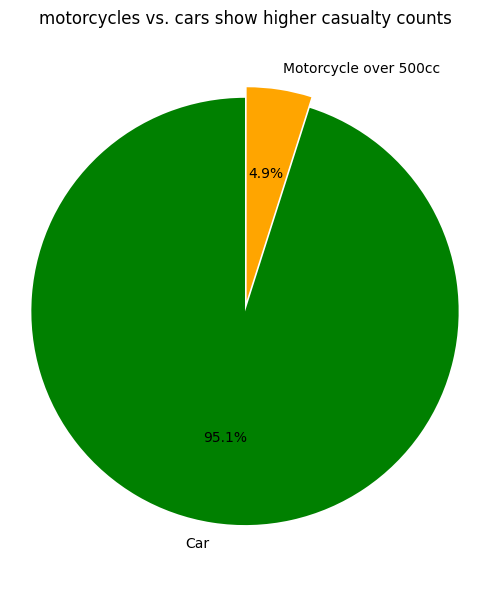

In [45]:
car_count = accident[accident['Vehicle_Type'] == 'Car'].shape[0]
motor_count = accident[accident['Vehicle_Type'] == 'Motorcycle over 500cc'].shape[0]

labels = ['Car', 'Motorcycle over 500cc']
sizes = [car_count, motor_count]

plt.figure(figsize=(5, 6))
plt.pie(sizes, 
        labels=labels,
        colors=['green', 'orange'],
        autopct='%1.1f%%',
        startangle=90,
        explode=[0.05, 0])  # Slightly separate slices

plt.title('motorcycles vs. cars show higher casualty counts')
plt.axis('equal')
plt.tight_layout()
plt.show()


<h2> Insights 15) </h2>
<h4> According to the data Cars shows a higher casualty counts having <b> 896,3856 </b> of casualties, over Motorcylces with <b> 461,826 </b> number of casualties </h4>

<h1>15) What is the relationship between Number of Vehicles and Number of Casualties in an accident?</h1>

In [46]:
accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

np.float64(0.22888886126927557)

In [47]:
accident.groupby('Number_of_Vehicles')['Number_of_Casualties'].count()

Number_of_Vehicles
1     200787
2     391995
3      52806
4      11300
5       2464
6        758
7        296
8        147
9         57
10        27
11        12
12         7
13         6
14         9
15         1
16         4
19         1
28         1
32         1
Name: Number_of_Casualties, dtype: int64

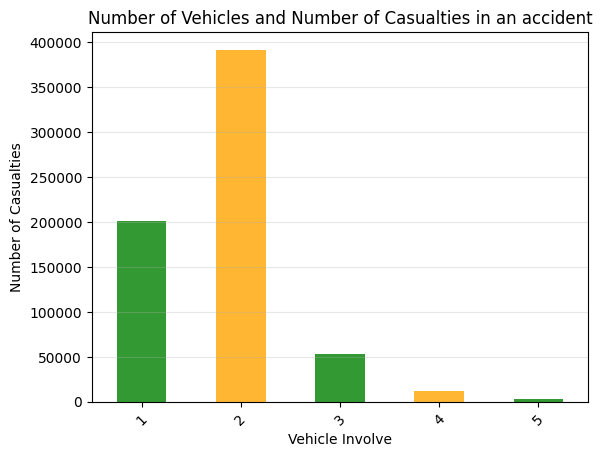

In [48]:
vehicle = accident.groupby('Number_of_Vehicles')['Number_of_Casualties'].size().head(5)

vehicle.plot(kind='bar', color=['green','orange'], alpha=0.8)
plt.title('Number of Vehicles and Number of Casualties in an accident')
plt.xlabel('Vehicle Involve')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

<h2> Insights 16) :</h2><h4> There is a moderate positive correlation (r = 0.23) between the number of vehicles involved and the number of casualties. On average, Two vehicles accidents tend to result in more casualties than single-vehicle accidents.</h4>

<h1>16) Are there particular District Areas where heavy vehicles cause more severe accidents?</h1>

In [49]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [50]:
heavy_vehicles = [
    'Bus or coach (17 or more pass seats)',
    'Van / Goods 3.5 tonnes mgw or under',
    'Motorcycle over 500cc',
    'Goods over 3.5t. and under 7.5t',
    'Agricultural vehicle',
    'Minibus (8 - 16 passenger seats)'
]

# Filter for heavy vehicles
cars = accident[accident['Vehicle_Type'].isin(heavy_vehicles)]

accident_severe = cars.groupby(
    ['Vehicle_Type', 'Accident_Severity']
).size().reset_index(name='Count')

top_severe = accident_severe.sort_values(by='Count', ascending=False)

print(top_severe.head(10)) 
print(f"total number of accident involving heavy cars on district areas is {accident_severe.value_counts().sum()}")

                            Vehicle_Type Accident_Severity  Count
17   Van / Goods 3.5 tonnes mgw or under            Slight  29139
5   Bus or coach (17 or more pass seats)            Slight  22180
14                 Motorcycle over 500cc            Slight  21861
8        Goods over 3.5t. and under 7.5t            Slight   5172
16   Van / Goods 3.5 tonnes mgw or under           Serious   4554
13                 Motorcycle over 500cc           Serious   3457
4   Bus or coach (17 or more pass seats)           Serious   3373
11      Minibus (8 - 16 passenger seats)            Slight   1671
2                   Agricultural vehicle            Slight   1644
7        Goods over 3.5t. and under 7.5t           Serious    857
total number of accident involving heavy cars on district areas is 18


In [51]:
heavy_vehicles = [
    'Bus or coach (17 or more pass seats)',
    'Van / Goods 3.5 tonnes mgw or under',
    'Motorcycle over 500cc',
    'Goods over 3.5t. and under 7.5t',
    'Agricultural vehicle',
    'Minibus (8 - 16 passenger seats)'
]

ays = accident[
    (accident['Vehicle_Type'].isin(heavy_vehicles)) &
    (accident['Accident_Severity'].isin(['Fatal', 'Serious']))
][['District Area', 'Accident_Severity']]

ays.value_counts().head(10)

District Area             Accident_Severity
Birmingham                Serious              257
Westminster               Serious              171
Leeds                     Serious              161
Sheffield                 Serious              128
Bradford                  Serious              107
Liverpool                 Serious              105
East Riding of Yorkshire  Serious              104
Southwark                 Serious               96
Lambeth                   Serious               95
Camden                    Serious               90
Name: count, dtype: int64

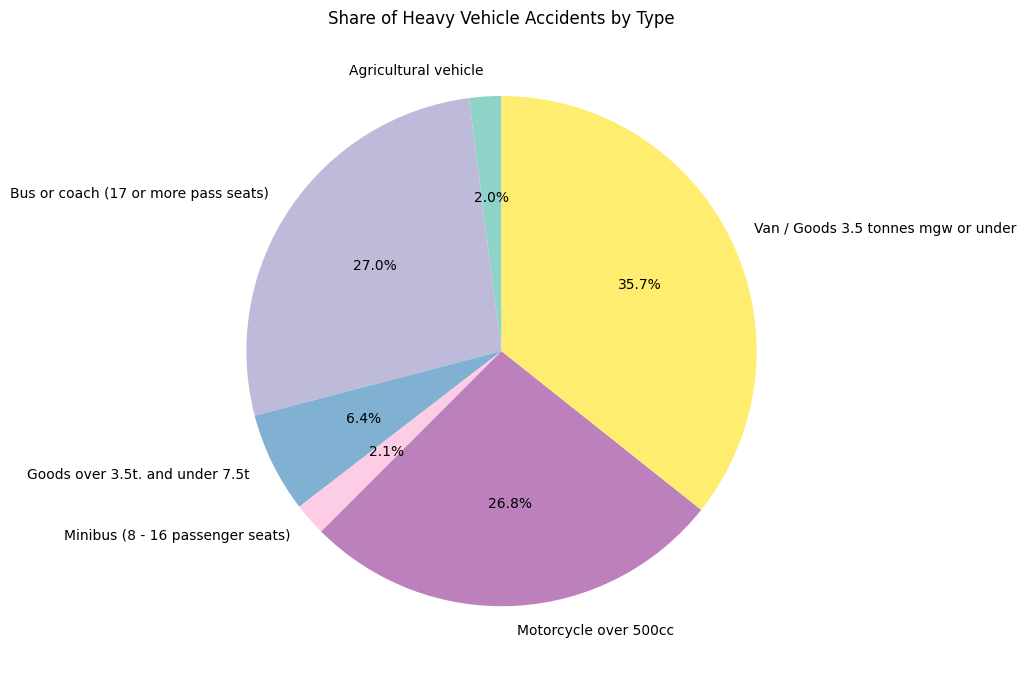

In [52]:
vehicle_totals = accident_severe.groupby('Vehicle_Type')['Count'].sum()
vehicle_totals.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10,10),
    colormap='Set3'
)
plt.title('Share of Heavy Vehicle Accidents by Type')
plt.ylabel("")
plt.tight_layout()
plt.show()

<h2> Insights 17) : </h2> <h4> The districts area that has large amount of severe accidents (Fatal and Serious) involving heavy vehicles such as bus etc. are Birmingham District Area with 257 Serious Accidents and Westminster with 171 </h4>

<h2>Insights 18) : </h2><h4> Van has the most amount of severe accidents involve, that totals to 29,139. Next to it is are bus with 22,180 severe cases </h4>

<h1>17) Compare Urban vs. Rural accident severity distributions.</h1>

In [53]:
accident.groupby('Accident_Severity')['Urban_or_Rural_Area'].count()

Accident_Severity
Fatal        8661
Serious     88217
Slight     563801
Name: Urban_or_Rural_Area, dtype: int64

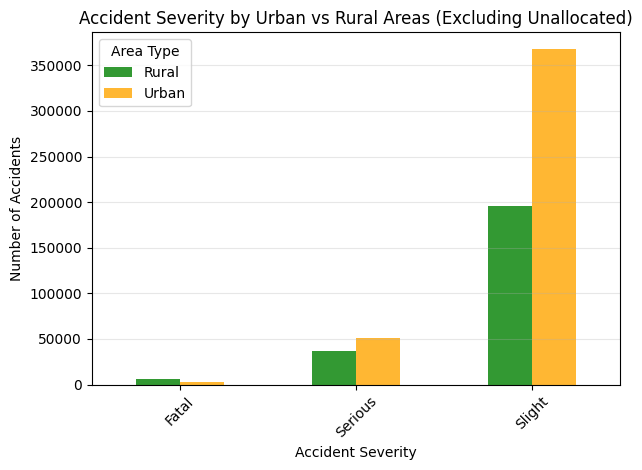

In [54]:
filtered_accident = accident[accident['Urban_or_Rural_Area'] != 'Unallocated']
urban_severity = pd.crosstab(filtered_accident['Accident_Severity'], filtered_accident['Urban_or_Rural_Area'])

urban_severity.plot(kind='bar', color=['green','orange'], alpha=0.8)
plt.title('Accident Severity by Urban vs Rural Areas (Excluding Unallocated)')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.legend(title='Area Type')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<h2> Insights 19): </h2> <h4>According to the data Rural places has the most Fatal accidents, whereas Urban areas have the most serious and slight severity recorded cases of accidents </h4>

<h1>18) Do weather conditions combined with light conditions (e.g., rain at night) show higher accident severity?</h1>

In [55]:
accident.groupby(['Light_Conditions', 'Weather_Conditions'])['Accident_Severity'].value_counts()

Light_Conditions             Weather_Conditions     Accident_Severity
Darkness - lighting unknown  Fine + high winds      Slight                 49
                                                    Serious                 7
                                                    Fatal                   3
                             Fine no high winds     Slight               4614
                                                    Serious               662
                                                                         ... 
Daylight                     Snowing + high winds   Serious                50
                                                    Fatal                   1
                             Snowing no high winds  Slight               3163
                                                    Serious               292
                                                    Fatal                  20
Name: count, Length: 113, dtype: int64

In [56]:
accident.groupby(['Light_Conditions', 'Weather_Conditions'])['Accident_Severity'].describe()

count unique     top  \
Light_Conditions            Weather_Conditions                             
Darkness - lighting unknown Fine + high winds          59      3  Slight   
                            Fine no high winds       5333      3  Slight   
                            Fog or mist                65      2  Slight   
                            Other                     186      3  Slight   
                            Raining + high winds      111      3  Slight   
                            Raining no high winds     621      3  Slight   
                            Snowing + high winds       15      1  Slight   
                            Snowing no high winds      94      2  Slight   
Darkness - lights lit       Fine + high winds        1852      3  Slight   
                            Fine no high winds      93958      3  Slight   
                            Fog or mist               921      3  Slight   
                            Other                    4803      3  Slight   
                            Raining + high winds     3066      3  Slight   
                            Raining no high winds   22666      3  Slight   
                            Snowing + high winds      241      3  Slight   
                            Snowing no high winds    1828      3  Slight   
Darkness - lights unlit     Fine + high winds          51      3  Slight   
                            Fine no high winds       1745      3  Slight   
                            Fog or mist                37      3  Slight   
                            Other                     143      2  Slight   
                            Raining + high winds       73      3  Slight   
                            Raining no high winds     459      3  Slight   
                            Snowing + high winds        5      2  Slight   
                            Snowing no high winds      30      2  Slight   
Darkness - no lighting      Fine + high winds         796      3  Slight   
                            Fine no high winds      25251      3  Slight   
                            Fog or mist               862      3  Slight   
                            Other                    1915      3  Slight   
                            Raining + high winds     1423      3  Slight   
                            Raining no high winds    6208      3  Slight   
                            Snowing + high winds      171      3  Slight   
                            Snowing no high winds     811      3  Slight   
Daylight                    Fine + high winds        5796      3  Slight   
                            Fine no high winds     408726      3  Slight   
                            Fog or mist              1643      3  Slight   
                            Other                   10103      3  Slight   
                            Raining + high winds     4942      3  Slight   
                            Raining no high winds   49742      3  Slight   
                            Snowing + high winds      453      3  Slight   
                            Snowing no high winds    3475      3  Slight   

                                                     freq  
Light_Conditions            Weather_Conditions             
Darkness - lighting unknown Fine + high winds          49  
                            Fine no high winds       4614  
                            Fog or mist                59  
                            Other                     154  
                            Raining + high winds       95  
                            Raining no high winds     550  
                            Snowing + high winds       15  
                            Snowing no high winds      86  
Darkness - lights lit       Fine + high winds        1497  
                            Fine no high winds      77944  
                            Fog or mist               773  
                            Other                    4213  
                   

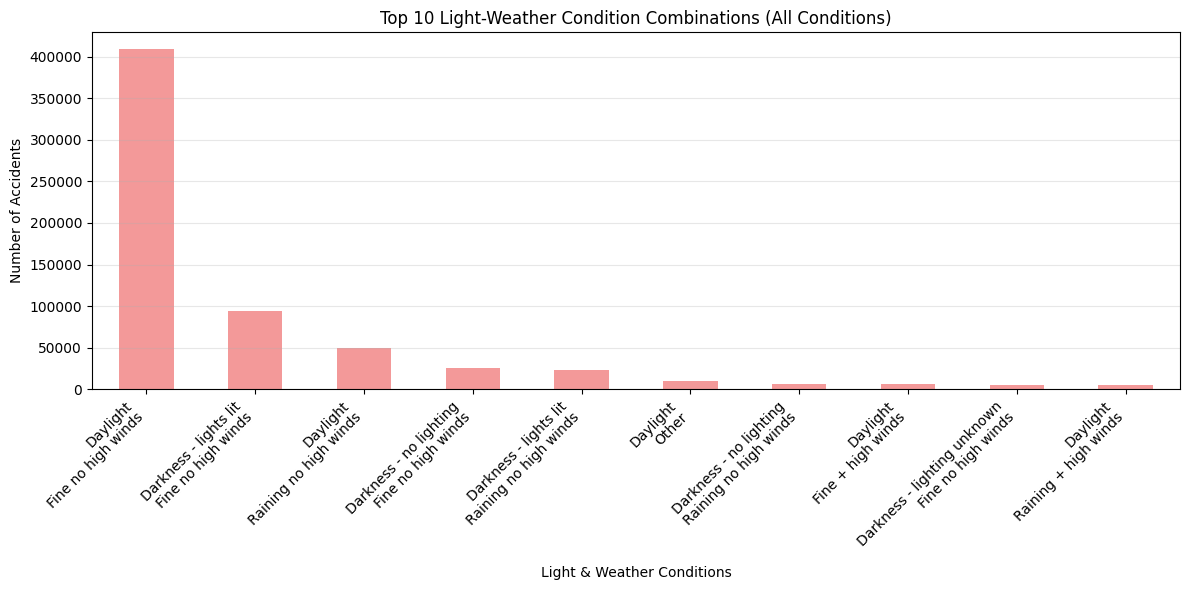

In [57]:
# Group by Light & Weather without filtering
conditions = (
    accident.groupby(['Light_Conditions', 'Weather_Conditions'])['Accident_Severity']
    .count()
    .nlargest(10)
)

# Flatten multi-index for plotting
conditions.index = [f"{light}\n{weather}" for light, weather in conditions.index]

conditions.plot(kind='bar', color='lightcoral', alpha=0.8, figsize=(12,6))
plt.title('Top 10 Light-Weather Condition Combinations (All Conditions)')
plt.xlabel('Light & Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<h2>Insigths 20) : </h2><h4> Weather conditions combined with poor lighting, such as rain, fog, or snow at night, lead to disproportionately higher accident severity, with darkness and lack of road lighting emerging as critical risk factors compared to similar conditions in daylight. </h4>

<h1> 19) What's the deadliest month on the road for the city of London in the year 2020 ?</h1>

In [58]:
# deadly = accident[accident['Accident_Severity'] != 'slight'][['Month']].value_counts()
# deadly.unstack()

# deadly = (accident[(accident['Accident_Severity'] != 'Slight') & (accident['District Area'] == 'City of London')].groupby(['Month', 'Accident_Severity' ]))
# deadly.size().unstack(fill_value=0)

london_deadly = accident[(accident['Accident_Severity'] != 'Slight') & 
                        (accident['District Area'] == 'City of London') & (accident['Year'] == 2020)]

deadly_by_month = london_deadly.groupby(['Month', 'Accident_Severity']).size().unstack(fill_value=0)

deadly_by_month = deadly_by_month.sort_index()

print("Accidents by Month and Severity:")
print(deadly_by_month)


Accidents by Month and Severity:
Accident_Severity  Fatal  Serious
Month                            
1                      0        2
2                      0        6
3                      0        3
4                      0        4
5                      0        5
6                      0        5
7                      0        1
8                      0        4
9                      1        7
10                     0        4
11                     1        3
12                     0        5


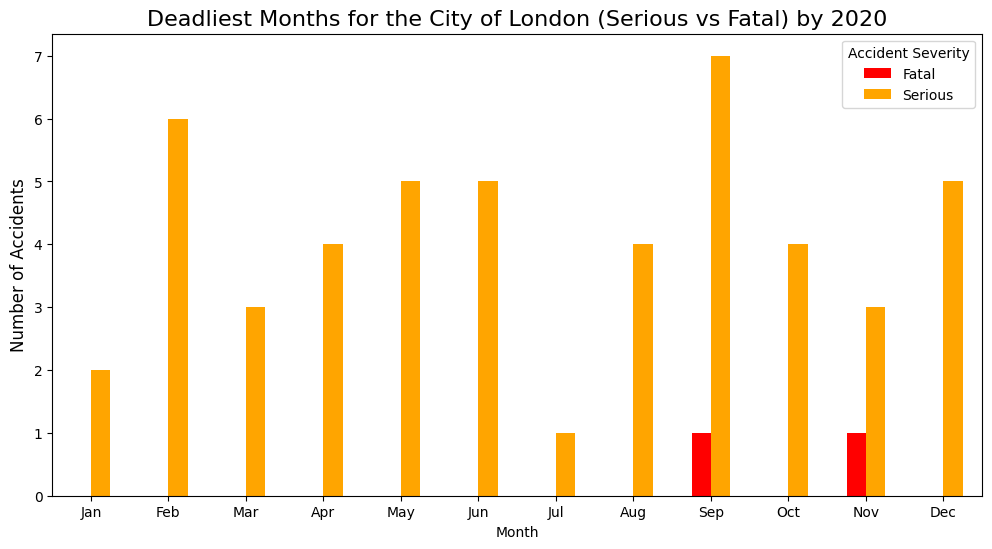

In [59]:

colors = ['red', 'orange']  # Fatal will be red, Serious will be orange
ax = deadly_by_month.plot(kind='bar', 
                         figsize=(12, 6), 
                         color=colors)


plt.title("Deadliest Months for the City of London (Serious vs Fatal) by 2020", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=12)
plt.yticks()
plt.xticks(rotation=360)
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title="Accident Severity")
plt.show()


<h2> Insights 21) : </h2> <h4> The deadliest month for City of London is: september,
Total serious and fatal accidents: 8. The year 2020 has low accident numbers as it is the time of the covid pandemic so road accidents aren't as common</h4>

<h1> Question 20) What yer does the road and weather conditions cause the severity of the accidents more</h1>

In [60]:
yearly_severity = accident.groupby(['Year', 'Accident_Severity','Weather_Conditions', 'Road_Surface_Conditions']).size().unstack(fill_value=0)
print(yearly_severity)


Road_Surface_Conditions                        Dry  Flood over 3cm. deep  \
Year Accident_Severity Weather_Conditions                                  
2019 Fatal             Fine + high winds        32                     0   
                       Fine no high winds     1804                     1   
                       Fog or mist               9                     0   
                       Other                     4                     0   
                       Raining + high winds      0                     1   
...                                            ...                   ...   
2022 Slight            Other                   476                     2   
                       Raining + high winds      6                    21   
                       Raining no high winds    95                    50   
                       Snowing + high winds      0                     1   
                       Snowing no high winds     7                     2   

Road_Surfac

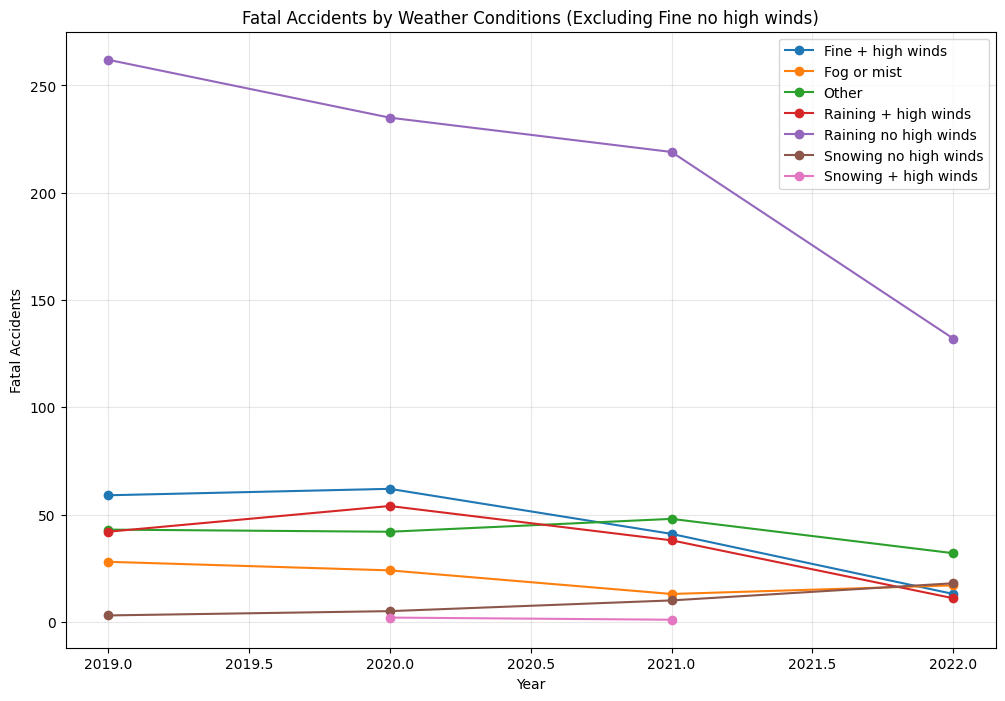

In [61]:

filtered_data = accident[accident['Weather_Conditions'] != 'Fine no high winds']
full_data = filtered_data.groupby(['Year', 'Accident_Severity', 'Weather_Conditions', 'Road_Surface_Conditions']).size().reset_index(name='Count')

fatal_data = full_data[full_data['Accident_Severity'] == 'Fatal']

plt.figure(figsize=(12, 8))
for condition in fatal_data['Weather_Conditions'].unique():
    data = fatal_data[fatal_data['Weather_Conditions'] == condition]
    yearly_sum = data.groupby('Year')['Count'].sum()
    plt.plot(yearly_sum.index, yearly_sum.values, marker='o', label=condition)

plt.xlabel('Year') 
plt.ylabel('Fatal Accidents')
plt.title('Fatal Accidents by Weather Conditions (Excluding Fine no high winds)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

<h2> Insights 22) :</h2>
<h4> Clear weather conditions with no high winds surprisingly account for the highest number of fatal accidents, suggesting that good weather may lead to overconfident driving and higher speeds.</h4>

<h2> Insights 23) :</h2>
<h4> (Excluding 'Fine no high winds') The category of 'Raining no high winds' has the 2nd most amount causet of fatal accidents in the year 2019-2022 </h4>

<h1> Question 21) Is there a correlation between road and weather conditions in the severity of the accidents, in the year 2019</h1>

In [62]:
accident['Year'].unique()

array([2019, 2020, 2021, 2022], dtype=int32)

In [63]:
df_2019 = accident[accident["Year"] == 2019]
accident_2019 = (
    df_2019
    .groupby(["Road_Surface_Conditions", "Weather_Conditions", "Accident_Severity"])
    .size()
    .reset_index(name="Count")
) 

slight_data = accident_2019[accident_2019['Accident_Severity'] == 'Slight']['Count'].values
serious_data = accident_2019[accident_2019['Accident_Severity'] == 'Serious']['Count'].values  
fatal_data = accident_2019[accident_2019['Accident_Severity'] == 'Fatal']['Count'].values

f_stat, p_value = f_oneway(slight_data, serious_data, fatal_data)
print(f"\n The F-statistic is : {f_stat}, and the p-value: {p_value}")


 The F-statistic is : 1.1724591674158673, and the p-value: 0.31428803985198517


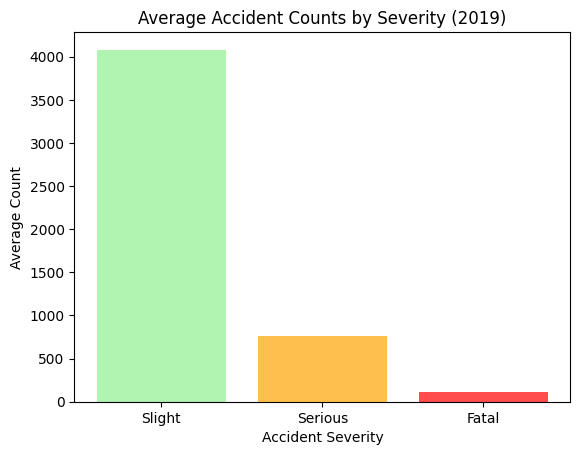

In [64]:
slight_data = accident_2019[accident_2019['Accident_Severity'] == 'Slight']['Count'].values
serious_data = accident_2019[accident_2019['Accident_Severity'] == 'Serious']['Count'].values  
fatal_data = accident_2019[accident_2019['Accident_Severity'] == 'Fatal']['Count'].values

severity_categories = ['Slight', 'Serious', 'Fatal']
means = [np.mean(slight_data), np.mean(serious_data), np.mean(fatal_data)]

plt.bar(severity_categories, means, color=['lightgreen', 'orange', 'red'], alpha=0.7)
plt.title('Average Accident Counts by Severity (2019)')
plt.xlabel('Accident Severity')
plt.ylabel('Average Count')
plt.show()

<h1> Insigths 24) :</h1>
<h4> There is no statistically significant relationship between road and weather conditions and accident severity in 2019 data, as indicated by the p-value of 0.314 being well above the 0.05 significance threshold.</h4>

<h1> Insigths 25) :</h1>
<h4> While this analysis may suggests no significant relationship. It does not prove that road and weather conditions have no impact on accident severity, as the effect may be too small to detect or may be influenced by different variables not considered in this analysis</h4>

<hr><h1> Using Folium and Seaborn for Vizualisation </h1><hr>

<h1>STEP 1) Extract Latitude and Longitude from the DataFrame </h1>

In [65]:
london_df = accident[accident['District Area'] == 'City of London']

In [66]:
locations = list(zip(london_df['Latitude'], london_df['Longitude']))

<h1>STEP 2) Create a base app centered in a specific location</h1>

In [67]:
m = folium.Map(location=[london_df['Latitude'].mean(), london_df['Longitude'].mean()], zoom_start=10)

<h1>STEP 3) Add the heatmap layer</h1>

In [68]:
HeatMap(locations).add_to(m)

<h1>STEP 4) Save or Displat the map</h1>

In [69]:
m.save('accident_heatmap.htm')
m

<h1> Question 22) What is the number of Fatal accidents that involves two wheeler vehicles on the District of Bolton </h1>

In [70]:
from folium.plugins import HeatMap
import pandas as pd
import numpy as np
import folium


Accident_Fatal = accident[accident['Accident_Severity'] != 'Slight']

Two_Wheeler_Accident = Accident_Fatal[
    Accident_Fatal['Vehicle_Type'].isin([
        'Motorcycle over 125cc and up to 500cc',
        'Motorcycle 125cc and under',
        'Motorcycle over 500cc',
        'Motorcycle 50cc and under',
        'Pedal cycle'
    ])
]

Bolton_df = Two_Wheeler_Accident[Two_Wheeler_Accident['District Area'] == 'Bolton']


Bolton_df_clean = Bolton_df.dropna(subset=['Latitude', 'Longitude'])
Bolton_locations = list(zip(Bolton_df_clean['Latitude'], Bolton_df_clean['Longitude']))
center_lat = Bolton_df_clean['Latitude'].mean()
center_lon = Bolton_df_clean['Longitude'].mean()


Bolton_m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=12,
    tiles='OpenStreetMap'
)


HeatMap(
    Bolton_locations,
    min_opacity=0.2,
    radius=15,
    blur=10,
    max_zoom=1
).add_to(Bolton_m)
Bolton_m.save('london_accident_heatmap.html')

print("Heatmap created successfully!")
print(f"Map center: ({center_lat:.6f}, {center_lon:.6f})")
print(f"The number of accidents that happened in Bolton is: {len(Bolton_locations):,}")

Bolton_m


Heatmap created successfully!
Map center: (53.566280, -2.469361)
The number of accidents that happened in Bolton is: 20


<h1> Insight 26) </h1>
    <h4> The number of severe accidents that involves two wheeler vehicles are 20, this severe cases are either <strong>Fatal</strong> or <strong>Serious</strong> accidents, most of this accidents occured on Intersection roads where vehicles meets to cross or change directions. Which according to research</h4>

<p> " Intersection accidents are a significant concern, accounting for approximately 40% of all traffic collisions in urban areas, and are often caused by factors such as traffic congestion, distracted driving, and poorly designed intersections. - <strong> Ddadmin. (2024, April 10) </strong> "</p>

<h4> This gives to the fact that motorcycle accidents are often the most dangerous type of accidents, and understanding their common causes, such as intoxication, overspeeding, and driver distraction, can help riders take necessary precautions to minimize the risk of accidents on the road. </h4>

<h1>Question 23) What is the number of Severe accidents involving Round Abouts that occured on Birmingham</h1>

In [71]:
filtered = accident[
    (accident['Year'] == 2020) & 
    (accident['Road_Type'] == 'Roundabout')
]

grouped_counts = filtered.groupby(['Accident_Severity', 'District Area']).size().reset_index(name='Accident_Count')
top_contributors = grouped_counts.loc[grouped_counts.groupby('Accident_Severity')['Accident_Count'].idxmax()]
print(top_contributors)

    Accident_Severity District Area  Accident_Count
1               Fatal       Bedford               2
49            Serious    Birmingham              15
369            Slight    Birmingham             217


In [72]:
accident[accident['Accident_Severity']=='Fatal']['District Area'].describe()

count           8661
unique           422
top       Birmingham
freq             105
Name: District Area, dtype: object

In [73]:
accident['Road_Type'].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road'], dtype=object)

In [74]:
B_deadly = accident[(accident['Accident_Severity'] != 'Slight') & 
                        (accident['District Area'] == 'Birmingham') & (accident['Year'] == 2020) & (accident['Road_Type']== 'Roundabout')]

B_df_clean = B_deadly.dropna(subset=['Latitude', 'Longitude'])
locations = list(zip(B_df_clean['Latitude'], B_df_clean['Longitude']))
center_lat = B_df_clean['Latitude'].mean()
center_lon = B_df_clean['Longitude'].mean()

a = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=12,
    tiles='OpenStreetMap'
)

HeatMap(
    locations,
    min_opacity=0.2,
    radius=15,
    blur=10,
    max_zoom=1
).add_to(a) 
print("Heatmap created successfully!")
print(f"Map center: ({center_lat:.6f}, {center_lon:.6f})")
print(f"Total Severe accidents ( Fatal & Serious ) : {len(locations):,}")
a

Heatmap created successfully!
Map center: (52.471702, -1.880819)
Total Severe accidents ( Fatal & Serious ) : 15


<h1> Insights 27) </h1>
    
<h4> The data shows that accidents that occured on the rounadbouts of birmingham is <strong>232</strong>, <strong> 15 </strong> being severe accidents. The location which had most the concentration of accidents on roundabouts are at the center of the city where most roundabouts are located. <br><br> And even though quite far from center of the city of birminghan, the roundabout of <strong>Yardley Wood Road</strong>, had the most amount of severe accidents, intel suggests that it's due to bad design of the roundabout and poor planning of the road.  </h4>

In [75]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

<h1> Question 24) What's the number of accidents during Raining and High winds in the city of Lancaster  </h1>

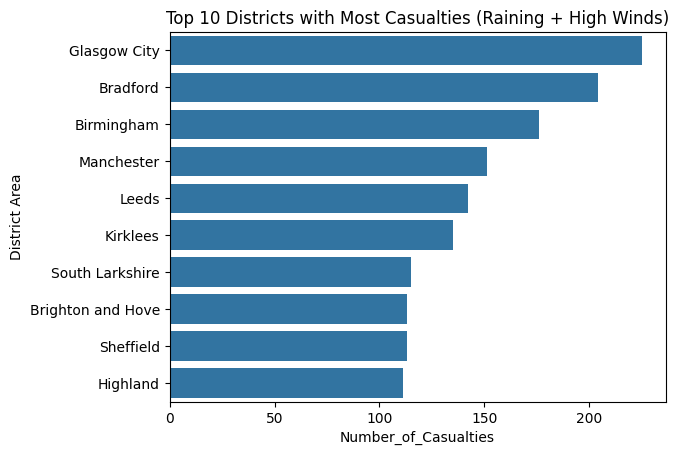

<bound method DataFrame.nlargest of        District Area  Number_of_Casualties
0       Glasgow City                   225
1           Bradford                   204
2         Birmingham                   176
3         Manchester                   151
4              Leeds                   142
5           Kirklees                   135
6    South Larkshire                   115
7  Brighton and Hove                   113
8          Sheffield                   113
9           Highland                   111>


In [76]:
raining_df = accident[accident['Weather_Conditions'] == 'Raining + high winds']

top_district = (
    raining_df.groupby("District Area")["Number_of_Casualties"]
    .sum()
    .nlargest(10)  
    .reset_index()
)

sns.barplot(
    x="Number_of_Casualties", 
    y="District Area", 
    data=top_district
)

plt.title("Top 10 Districts with Most Casualties (Raining + High Winds)")
plt.show()
print(top_district.nlargest)


<h1>Insights 28 )</h1>

<h4>Glasgow had the highest number of casualties during rain and high winds in the UK from 2019–2022, with 225 incidents.</h4>

<p>Glasgow is one of the wettest cities in the UK, ranking in the top 3, due to its location on Scotland's west coast. This position causes moist Atlantic air to drop heavy rainfall as it moves inland. Next on the list is Bradford (The Wettest Places in the UK Revealed… and Why These Cities Are So Soggy, n.d.).</p>

<p>Population also plays a role. By 2022, the UK’s top populated cities were Manchester (2,730,000), Birmingham (2,607,000), and Glasgow (1,673,000) (Douglas, 2022).</p>

<h4>Because of their geography, weather, and population size, these areas are more likely to experience accidents.</h4>


<h1> Question 25) The number of accidents that occured during on weekends vs weekdays on Burnley  </h1>

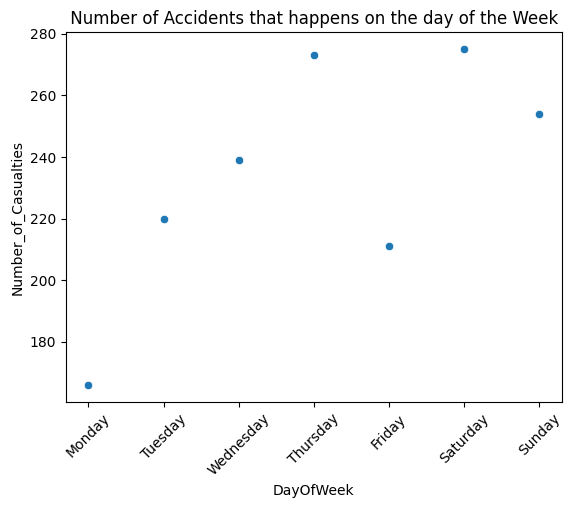

   DayOfWeek  Number_of_Casualties
0          0                   166
1          1                   220
2          2                   239
3          3                   273
4          4                   211
5          5                   275
6          6                   254


In [77]:
burnley_df = accident[accident['District Area'] == 'Burnley']

top_district = (
    burnley_df.groupby("DayOfWeek")["Number_of_Casualties"]
    .sum()
    .head(10)
    .reset_index()
)

sns.scatterplot(
    x="DayOfWeek", 
    y="Number_of_Casualties", 
    data=top_district
)


plt.xticks(
    ticks=range(7), 
    labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.xticks(rotation = 45)
plt.title(" Number of Accidents that happens on the day of the Week ")
plt.show()
print(top_district)

<h1>Insights 29</h1>

<h4>Saturday had the highest number of accidents in Burnley</h4>

<p>On Burnley’s roads, Saturday recorded the most accidents in a week with 275 incidents, followed closely by Wednesday with 273.</p>

<p>This is likely due to increased recreational travel, more alcohol-related driving, speeding, driver fatigue, and less caution when traveling in unfamiliar areas. Fridays also see a rise in accidents during rush hour as people leave the city for the weekend.</p>


<h1>Question 26) Which part experience more severe accidents on Richmond upon tames, using cars </h1>

In [78]:
R_df = accident[(accident['District Area'] == 'Richmond upon Thames') & (accident['Vehicle_Type'] =='Car') & (accident['Accident_Severity'] !='Slight')]
R_df_clean = R_df.dropna(subset=['Latitude', 'Longitude'])
R_locations = list(zip(R_df_clean['Latitude'], R_df_clean['Longitude']))
R_center_lat = R_df_clean['Latitude'].mean()
R_center_lon = R_df_clean['Longitude'].mean()

R_m = folium.Map(
    location=[R_center_lat, R_center_lon],
    zoom_start=12,
    tiles='OpenStreetMap'
)

HeatMap(
    R_locations,
    min_opacity=0.2,
    radius=15,
    blur=10,
    max_zoom=1
).add_to(R_m) 
R_m.save('london_accident_heatmap.html')
print("Heatmap created successfully!")
print(f"Map center: ({center_lat:.6f}, {center_lon:.6f})")
print(f"The number of accidents that happened on Bolton is: {len(locations):,}")
R_m

Heatmap created successfully!
Map center: (52.471702, -1.880819)
The number of accidents that happened on Bolton is: 15


<h1>Insights 30</h1>

<h4>The central area of Richmond experiences a high number of accidents, with cars being involved in most cases. This concentration suggests that traffic density, frequent intersections, and higher pedestrian activity in the city center contribute to the increased risk of collisions compared to other parts of Richmond.</h4>


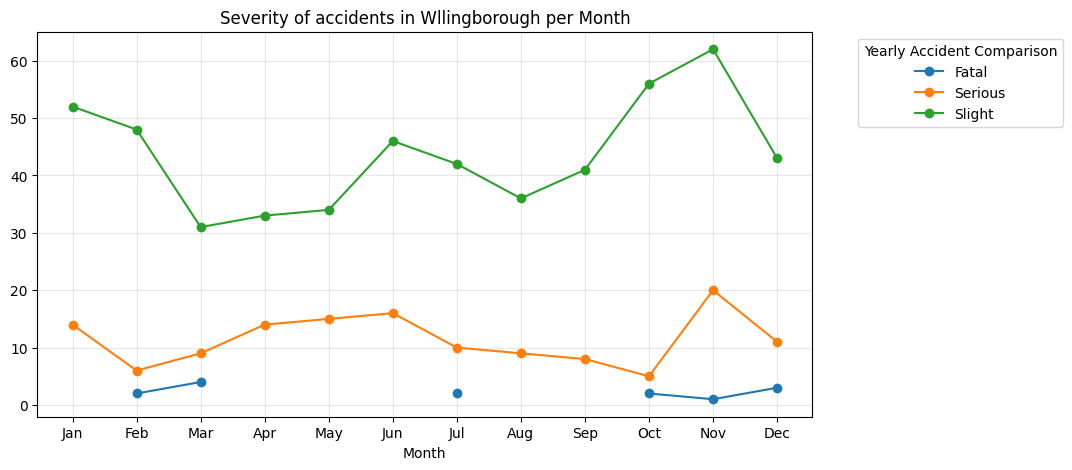

In [81]:
monthly_Wellingborough = accident[accident['District Area'] == 'Wellingborough']
monthly_londondata = monthly_Wellingborough.groupby(['Accident_Severity', 'Month']).size()
monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Severity of accidents in Wllingborough per Month'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h1>Insights 31</h1>

<h4>Fatal accidents are the least common, serious accidents are more frequent, and slight accidents occur most often in the city of Wellingborough this is a normal distribution.</h4>